# openCV

In [1]:
import cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("pool.jpg")

- 이미지를 그림으로 출력하는 코드는 다음과 같다. 아래에서 plt.axis("off")함수는 눈금을 나타나지 않게 하는 코드이다.

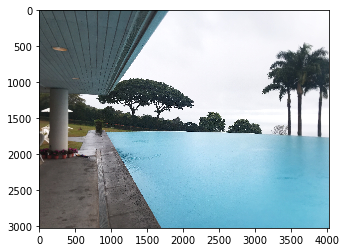

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 눈금을 안 봉게 하기
# plt.axis("off")
plt.show()

- 위에서 cv2.COLOR_BGR2RGB 옵션을 준 것은 데이터 순서가 openCV에서는 일반적인 컬러 표현 방식인 RGB 순서로 이미지 데이터를 기록하지 안호, BGR 순서로 기록하고 있기 때문에 순서를 조정해 주기 위한 것이다.
- 이미지를 반전으로 보이게 하려면 즉, 네거티브 이미지로 보이게 하려면 다음과 같이 간단히 처리할 수 있다.

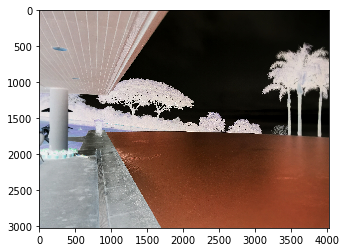

In [5]:
img2 = 255 - img
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

- 이미지를 그레이로 변환하려면 아래와 같이 색상 변화 함수 cvtCOlor에서 옵션을 cv2.COLOR_BGR2GRAY로 하여야한다.

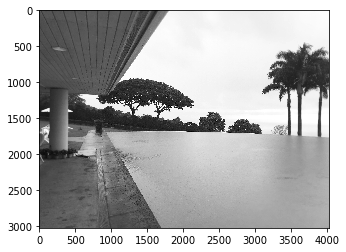

In [9]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap='gray')

- 이미지의 일부만 잘라서 보려면 아래와 같이 원하는 위치로 크기를 자르면 된다.

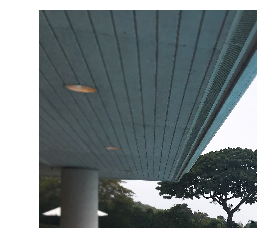

In [10]:
# 폭과 높이 조정
im2 = img[0:1500, 0:1500]
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [15]:
img.shape

(1810, 2716, 3)

# 9.2 얼굴 인식

In [25]:
## 얼굴 패턴 정보를 담고 있는 xml파일 다운로드
!curl -L https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml \-o haar.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   170  100   170    0     0    432      0 --:--:-- --:--:-- --:--:--   433
100  660k  100  660k    0     0   263k      0  0:00:02  0:00:02 --:--:--  344k


In [27]:
# 캐스케이드 파일 지정해서 검출기 생성
cascade_file = "haar.xml"
cascade = cv2.CascadeClassifier(cascade_file)

- 아래는 임의의 가족 사진을 대상으로 이미지를 읽고 화면에 보이는 코드다.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 1733k  100 1733k    0     0   702k      0  0:00:02  0:00:02 --:--:-- 3340k


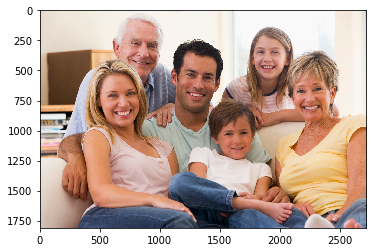

In [28]:
!curl -L https://www.dropbox.com/s/88q6oxlu03twfze/families.jpg -o families.jpg
img = cv2.imread("families.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

- 얼굴 인식 프로그램은 컬러가 아니라 그레이 스케일에서 수행해야한다. 아래는 컬러 사진을 그레이 스케일로 변환하고 얼굴을 인식하고 얼굴에 해당하는 부분에 박스를 그리는 코드이다.

In [30]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# 결과 확인하기
if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit() 

- 인식한 부분 표시하기

In [31]:
for (x,y,w,h) in face_list:
    print("얼굴의 좌표=", x,y,w,h)
    red = (0,0,225)
    cv2.rectangle(img, (x,y), (x+w,y+h), red, thickness=20)

얼굴의 좌표= 676 144 381 381
얼굴의 좌표= 1736 231 313 313
얼굴의 좌표= 1126 393 401 401
얼굴의 좌표= 2065 535 352 352
얼굴의 좌표= 482 551 396 396
얼굴의 좌표= 1472 906 322 322


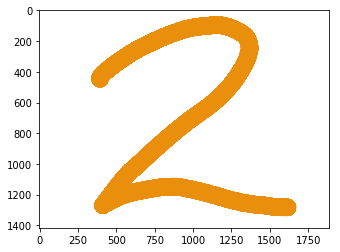

In [107]:
# 이미지 출력하기 
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

- 위에서 총 5개의 얼굴을 인식하였다. 얼굴 인식에 사용된 그레이 이미지를 출력해 보고, 얼굴 부분을 모자이크로 처리하는 방법을 소개하겠다.
- 모자이크를 처리하기 위한 함수 mosaic() 코드는 아래와 같다.

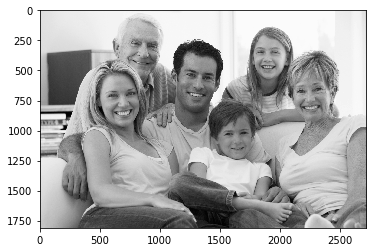

In [33]:
slice = img_gray[x:x+w, y:y+h]
cv2.imwrite("face-pickup.png", slice)
plt.imshow(img_gray, cmap="gray")
plt.show()

In [34]:
def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w,h), interpolation=cv2.INTER_AREA)
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

- 얼굴 부분만 모자이크 처리하기

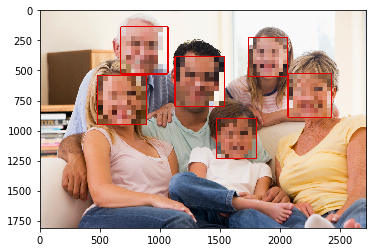

In [35]:
for (x,y,w,h) in face_list:
    img = mosaic(img, (x,y,x+w, y+h), 10)
    #이미지 출력하기
    # cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 손글씨 숫자 인식

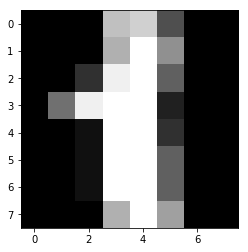

In [36]:
import cv2
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
digits = datasets.load_digits()
plt.imshow(digits.images[1], cmap="gray")
plt.show()

- 각 픽셀은 0~15의 숫자로 표현되는데 숫자가 크면 밝은 색을 나타낸다.
아래는 첫 번째 이미지의 내용을 나타냈다.

In [37]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


- 아래는 총 15개의 숫자 데이터를 읽어 이미지로 표현하는 코드이다.

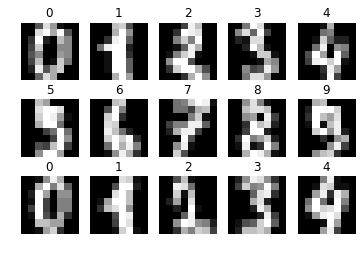

In [38]:
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")
plt.show()

- 이제 숫자 이미지를 인식하는 코드를 작성한다. 8x8 크기의 2차원 이미지를 64 크기의 1차원 벡터로 보고 숫자를 인식하는 방법을 사용하겠다.
- 이 방법은 성능이 좋은 방법은 아니지만 이미지를 단순히 숫자의 나열로 보고 숫자의 발생 패턴이 비슷하면 같은 숫자를 의미한다고 가정하는 방식이다.

In [93]:
x = digits.images
x = x.reshape((-1,64))
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

clf = svm.LinearSVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9355555555555556


/Users/heojeong-wook/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


- 위에서는 분류기로 SVM이 제공하는 svc모델을 사용하였다. SVM은 선형 모델의 성능을 개선한 방법이다.
- 학습한 모델 파라미터를 digits.pkl 파일에 피클 형식으로 저장하는 코드이다. 피클 형식이란 임의의 데이터 묶음을 하나의 파일로 저장하는 형식을 말한다.(피클처럼 오래 저장한다는 의미를 가짐)

In [94]:
from sklearn.externals import joblib
joblib.dump(clf, 'digits.pkl')


['digits.pkl']

In [95]:
def predict_digit(filename):
    # 학습한 데이터 읽어 들이기
    model = joblib.load("digits.pkl")
    my_img = cv2.imread(filename)
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8,8))
    my_img = 15 - my_img //16
    # 흑백 반전
    my_img = my_img.reshape((-1,64))
    res = model.predict(my_img)
    return res[0]
    

in.png = 2


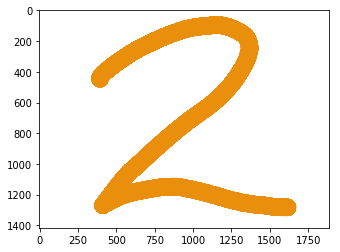

In [102]:
img = cv2.imread("in.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("in.png")
print("in.png = " + str(n))
plt.show()

in.png = 2


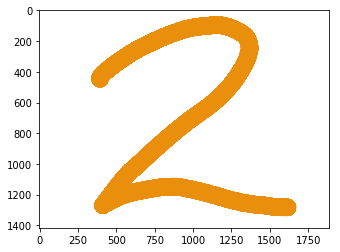

In [103]:
img = cv2.imread("in.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("in.png")
print("in.png = " + str(n))
plt.show()

- 다른 숫자 이미지에 대해서 실행해보겠다.

- 아래와 같이 글자가 중앙에 있지 않은 경우는 잘 인식하지 못한다. 이는 SVM 알고리즘의 한계이며 딥러닝을 사용하면 해결된다.

dme.JPG = 4


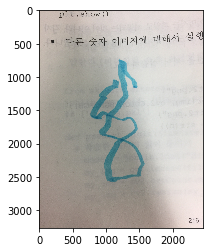

In [85]:
img = cv2.imread("sir.JPG")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("sir.JPG")
print("sir.JPG = " + str(n))
plt.show()

sir.png = 4


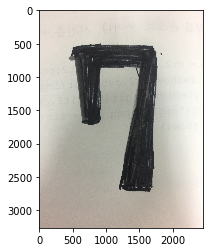

In [99]:
img = cv2.imread("sir.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("sir.png")
print("sir.png = " + str(n))
plt.show()

In [108]:
# 캐스케이드 파일 지정해서 검출기 생성
cascade_file = "haar.xml"
cascade = cv2.CascadeClassifier(cascade_file)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 1733k  100 1733k    0     0   6  0      0 --:--:--  0:00:02 --:--:--     020k      0  0:00:02  0:00:02 --:--:-- 2610k


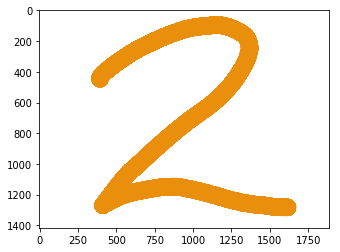

In [109]:
!curl -L https://www.dropbox.com/s/88q6oxlu03twfze/families.jpg -o families.jpg
img = cv2.imread("ya.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# 결과 확인하기
if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit() 

In [ ]:
for (x,y,w,h) in face_list:
    print("얼굴의 좌표=", x,y,w,h)
    red = (0,0,225)
    cv2.rectangle(img, (x,y), (x+w,y+h), red, thickness=20)

In [ ]:
# 이미지 출력하기 
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
aa